<a href="https://colab.research.google.com/github/itissandeep98/ML-Assignments/blob/master/ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression

In [78]:
class MyLinearRegression():
  """
	My implementation of Linear Regression.
	"""
  def __init__(self):
    pass

  def cross_validation(self,data,epoch=100,alpha=0.01,k=10):
    m=data.shape[0]
    split_start=0
    split_end=m//k
    theta_list=[0]*k
    training_loss_list=[0]*k
    validation_loss_list=[0]*k
    error_min=float("inf")
    idx=0
    for i in range(k):

      test=data[split_start:split_end,:]
      train=np.concatenate((data[:split_start,:],data[split_end:,:]),axis=0)

      split_start=split_end
      split_end+=m//k

      self.fit(train[:,1:],train[:,0],epoch,alpha)
      prediction=self.predict(test[:,1:])

      theta_list[i]=self.theta
      training_loss_list[i]=self.training_loss
      validation_loss_list[i]=abs(prediction-test[:,0])

      error=sum(validation_loss_list[i])

      if(error<error_min):
        idx=i
        error_min=error
        
    self.theta=theta_list[idx]
    self.training_loss=training_loss_list[idx]
    self.validation_loss=validation_loss_list[idx]
    
    
      

  def gradient_descent(self,X,y,epochs=200,alpha=0.01):
    """
    Finding theta using the gradient descent model

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.

    y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.

    epochs : Number of times gradient descent has to run

    alpha : Learning rate of gradient descent

    Returns
    -------
    theta : Calculated value of theta on given test set (X,y) with learning rate alpha 
    """
    m=len(y)
    theta=np.transpose(np.array([0]*len(X[0])))                      # created a column vector theta of length equal to number of features in X with all the initial values 0
    training_loss=np.array([])
    for i in range(epochs):
      theta=theta-(alpha/m)*self.RMSE(X,y,theta)
      training_loss=np.append(training_loss,sum(abs(X.dot(theta)-y)))
   
    return (theta,training_loss)

  def RMSE(self,X,y,theta):
    """
    finding Root Mean Squared Error based on current model parameters

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.

    y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.

    theta : Value of theta at which derivative of cost has to be found

    Returns
    -------
    derv : derivative of cost at the value theta
    """
    X_trans=np.transpose(X)                                           # Transpose of vector X
    derv =(X_trans.dot(X.dot(theta)-y))                               # Calculates X` * ( X*theta - y )

    return derv

  def fit(self, X, y,epoch=400,alpha=0.01):
    """
    Fitting (training) the linear model.

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.

    y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.

    Returns
    -------
    self : an instance of self
    """
    X_trans=np.transpose(X)
    # try:
    #   self.theta = np.linalg.inv(X_trans.dot(X)).dot(X_trans).dot(y)  # using the normal eqn, theta = inv(X`*X)*X`*y
    # except:
    self.theta,self.training_loss = self.gradient_descent(X,y,epoch,alpha) # using the gradient descent method with given number of epochs and learning rate

    # fit function has to return an instance of itself or else it won't work with test.py
    return self


  def predict(self, X):
    """
    Predicting values using the trained linear model.

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

    Returns
    -------
    y : 1-dimensional numpy array of shape (n_samples,) which contains the predicted values.
    """
    
    y=np.dot(X,self.theta)
    # return the numpy array y which contains the predicted values
    return y

  def plot_loss(self,y):
    x=np.arange(y.shape[0])
    plt.plot(x,y,color="g")
    plt.show()
    


## Dataset2

[ 0.10125076 -0.01192254]


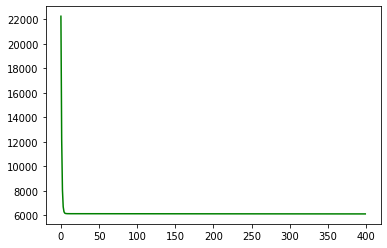

In [89]:
x=pd.read_csv('/content/VideoGameDataset.csv')
x.dropna(inplace=True)
# print(x[['User_Score','Critic_Score','Global_Sales']])

data=x[['User_Score','Critic_Score','Global_Sales']]
data=data.to_numpy().astype(np.float)

linear = MyLinearRegression()
linear.cross_validation(data,400,0.0001)

print(linear.theta)

linear.plot_loss(linear.training_loss)

# linear.plot_loss(linear.validation_loss)

## Dataset1

In [ ]:
x=pd.read_csv('/content/Dataset.data',delim_whitespace=True,header=None)
x[0].replace('M',1,inplace=True)
x[0].replace('F',2,inplace=True)
x[0].replace('I',3,inplace=True)
x=x.to_numpy()
a=np.transpose([x[:,-1]])
b=x[:,:-1]
data=np.concatenate((a,b),axis=1)

linear = MyLinearRegression()
linear.cross_validation(data)
print(linear.theta)
print(linear.training_loss.shape,x.shape)
print(linear.validation_loss.shape)
linear.plot_loss(linear.training_loss)
linear.plot_loss(linear.validation_loss)

# Logistic Regression

In [ ]:
class MyLogisticRegression():
	"""
	My implementation of Logistic Regression.
	"""

	def __init__(self):
		pass

	def sigmoid(self,z):
		"""
		Find the sigmoid value of z

		Parameters
		----------
		z : 1-dimensional numpy array of shape (n_samples,)

		Returns
		-------
		value of z in sigmoid function
		"""
		return 1/(1+np.exp(-z))
	
	def cost_diff(self,X,y,theta):
		"""
		Find Log Loss error in current model parameters

		Parameters
		----------
		X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.

		y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.

		theta : Value of theta at which derivative of cost has to be found

		Returns
		-------
		derv : derivative of cost at the value theta
		"""
		X_trans=np.transpose(X)										                       # Transpose of vector X
		
		derv =(X_trans.dot(self.sigmoid(X.dot(theta))-y))				         # Calculates X` * ( sigmoid(X*theta) - y )
		return derv

	
	def gradient_descent(self,X,y,epochs=100,alpha=0.01):
		"""
		Finding theta using the gradient descent model

		Parameters
		----------
		X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.

		y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.

		epochs : Number of times gradient descent has to run

		alpha : Learning rate of gradient descent

		Returns
		-------
		theta : Calculated value of theta on given test set (X,y) with learning rate alpha 
		"""
		m=len(y)
		theta=np.transpose(np.array([0]*len(X[0])))                     # created a column vector theta of length equal to number of features in X with all the initial values 0
		
		for i in range(epochs):
		  theta=theta-(alpha/m)*self.cost_diff(X,y,theta)
		
		return theta

	def fit(self, X, y):
		"""
		Fitting (training) the logistic model.

		Parameters
		----------
		X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.

		y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.

		Returns
		-------
		self : an instance of self
		"""
		self.theta = self.gradient_descent(X,y,200,0.01)              # using the gradient descent method with given number of epochs and learning rate

		# fit function has to return an instance of itself or else it won't work with test.py
		return self

	def predict(self, X):
		"""
		Predicting values using the trained logistic model.

		Parameters
		----------
		X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

		Returns
		-------
		y : 1-dimensional numpy array of shape (n_samples,) which contains the predicted values.
		"""
		y=self.sigmoid(X.dot(self.theta))
	
		# return the numpy array y which contains the predicted values
		return y

# Testing


In [3]:
Xtrain = np.array([[1, 2, 3], 
                   [4, 5, 6]])
ytrain = np.array([1, 2])

Xtest = np.array([[7, 8, 9]])
ytest = np.array([3])

print('Linear Regression')

linear = MyLinearRegression()
linear.fit(Xtrain, ytrain)
print(linear.theta)
ypred = linear.predict(Xtest)

print('Predicted Values:', ypred)
print('True Values:', ytest)

print('Logistic Regression')

logistic = MyLogisticRegression()
logistic.fit(Xtrain, ytrain)

ypred = logistic.predict(Xtest)

print('Predicted Values:', ypred)
print('True Values:', ytest)

Linear Regression
[0.03028946 0.12308121 0.21587297]
Predicted Values: [3.13953261]
True Values: [3]
Logistic Regression


NameError: ignored